From [this site](https://datascienceplus.com/how-to-use-r-for-matching-samples-propensity-score/).

In [ ]:
set.seed(561)
install.packages('MatchIt')
install.packages('tableone')
require('knitr')
install.packages('wakefield')
install.packages('captioner')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
n.pat <- 20
age <- sample(50:95, n.pat, replace = T)
gender <- sample(as.factor(c("Male","Female")), n.pat, replace=T, prob = c(0.70, 0.30))
patients <- data.frame(age, gender)
patients$class <- rep(as.factor(1), n.pat)

n.pop <- 1300
age <- sample(30:90, n.pop, replace = T)
gender <- sample(as.factor(c("Male","Female")), n.pop, replace=T, prob = c(0.50, 0.50))
population <- data.frame(age, gender)
population$class <- rep(as.factor(0), n.pop)

data <- rbind(patients, population)

require('tableone')
CreateTableOne(vars=c('age','gender'), data=data, strata='class')

                   Stratified by class
                    1             0             p      test
  n                    20          1300                    
  age (mean (SD))   70.15 (12.46) 59.44 (17.53)  0.007     
  gender = Male (%)    13 (65.0)    657 (50.5)   0.290     

In [ ]:
require('MatchIt')

match.it <- matchit(as.factor(class) ~ age + gender, data = data, method="nearest", ratio=1)

match <- match.data(match.it)[1:ncol(data)]

In [ ]:
CreateTableOne(vars=c('age','gender'), data=match, strata='class')

                   Stratified by class
                    1             0             p      test
  n                    20            20                    
  age (mean (SD))   70.15 (12.46) 70.00 (12.18)  0.969     
  gender = Male (%)    13 (65.0)     13 (65.0)   1.000     

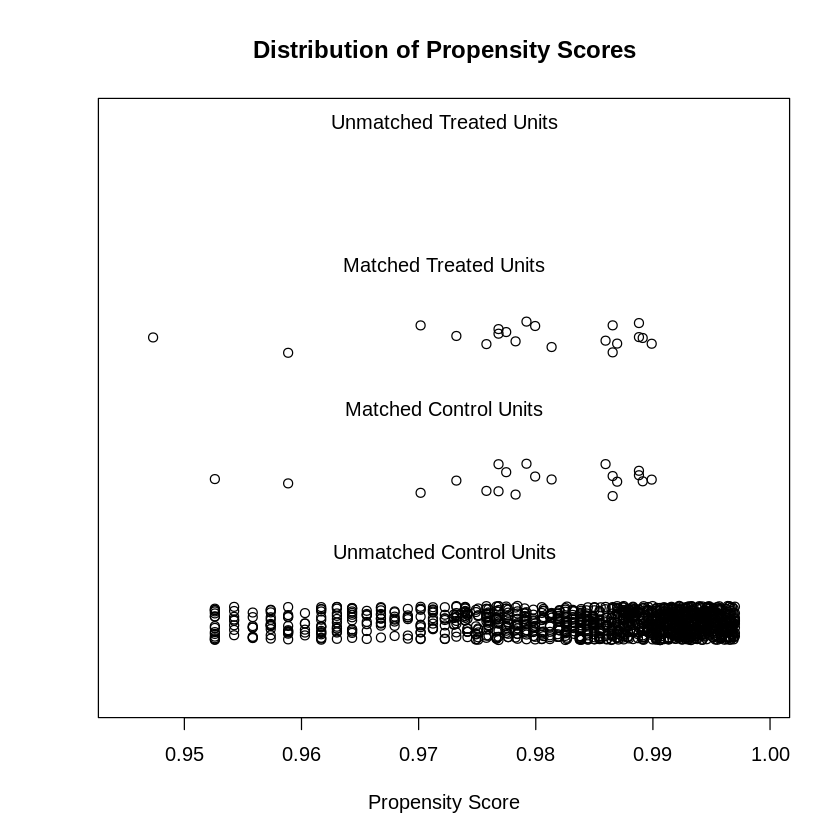

In [ ]:
plot(match.it, type = 'jitter', interactive = FALSE)

Propensity scores are explained [Modern Algorithms for Matching in Observational Studies](https://www.annualreviews.org/doi/full/10.1146/annurev-statistics-031219-041058).

Also [A Step-by-Step Guide to Propensity Score Matching in R](https://scholarworks.umass.edu/pare/vol19/iss1/18/).

And [How to use R for matching samples (propensity score)](https://datascienceplus.com/how-to-use-r-for-matching-samples-propensity-score/).

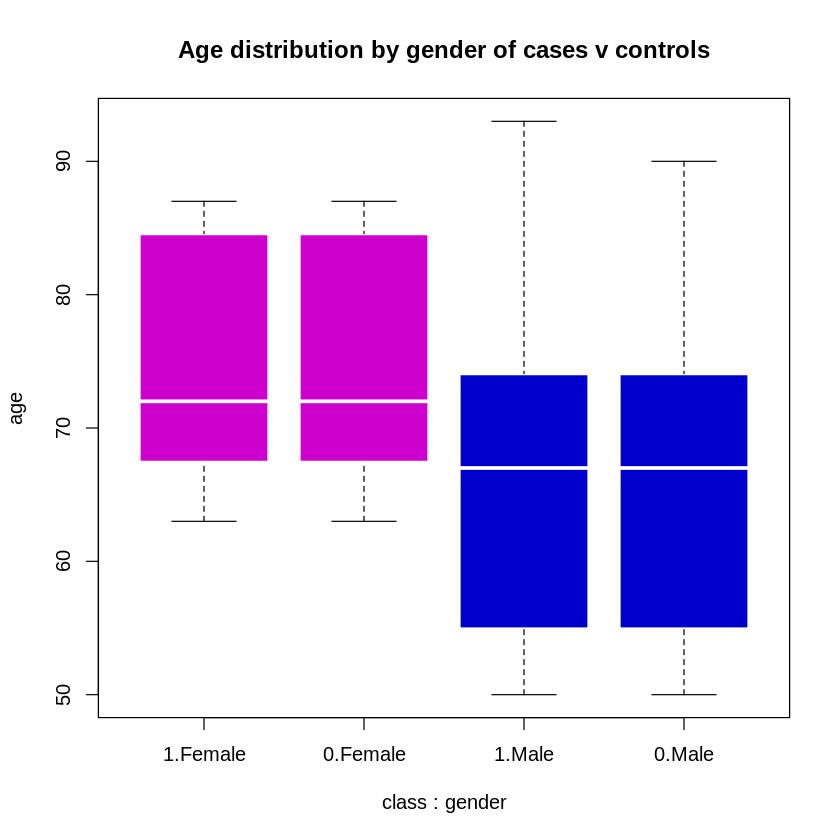

In [ ]:
boxplot(age ~ class*gender, match, col=c(rep('magenta3',2), rep('blue3',2)),
        boxcol='white', outcol='white', outbg='',
        medcol='white', main='Age distribution by gender of cases v controls')